https://www.youtube.com/watch?v=Wqmtf9SA_kk

In [1486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1487]:
data = pd.read_csv("nybolig_data.csv")


In [1488]:
data

,url,address,postal_code,type,price,size,basement_size,rooms,year_built,year_rebuilt,energy_label
0,https://www.nybolig.dk/villa/3100/arfriisvej/2...,A R Friis Vej 9 3100 Hornbæk,3100,villa,9975000,269,12.0,9,1895,1999.0,D
1,https://www.nybolig.dk/fritidshus/7990/akoldin...,A. Koldings Vej 8 Sillerslev 7990 Øster Assels,7990,fritidsbolig,1495000,96,0.0,4,2008,NaN,NaN
2,https://www.nybolig.dk/villa/6400/aabenraavej/...,Aabenraavej 103 Ragebøl 6400 Sønderborg,6400,villa,1295000,219,0.0,7,1924,NaN,E
3,https://www.nybolig.dk/villa/6100/aabenraavej/...,Aabenraavej 59 6100 Haderslev,6100,villa,2495000,226,35.0,6,1947,2010.0,C
4,https://www.nybolig.dk/villa/9240/aagade/27020...,Aagade 4 Vegger 9240 Nibe,9240,villa,495000,159,59.0,4,1958,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...
5420,https://www.nybolig.dk/villa/8210/oestrevej/25...,Østrevej 5 Hasle 8210 Aarhus V,8210,villa,5248000,111,90.0,6,1928,2012.0,C
5421,https://www.nybolig.dk/villa/8930/oestrupvej/2...,Østrupvej 11 Albæk 8930 Randers NØ,8930,villa,995000,231,0.0,6,1850,2006.0,E
5422,https://www.nybolig.dk/villa/7130/oestrupvej/2...,Østrupvej 26 Glud 7130 Juelsminde,7130,villa,895000,83,6.0,4,1952,NaN,D
5423,https://www.nybolig.dk/villa/7130/oestrupvej/2...,Østrupvej 49 Glud 7130 Juelsminde,7130,villa,3995000,241,0.0,7,1986,2008.0,A2010


In [1489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            5425 non-null   object 
 1   address        5425 non-null   object 
 2   postal_code    5425 non-null   int64  
 3   type           5425 non-null   object 
 4   price          5425 non-null   int64  
 5   size           5425 non-null   int64  
 6   basement_size  4528 non-null   float64
 7   rooms          5425 non-null   int64  
 8   year_built     5425 non-null   int64  
 9   year_rebuilt   2049 non-null   float64
 10  energy_label   4789 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 466.3+ KB


In [1490]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis = 1)
y = data['price']

array([[<Axes: title={'center': 'postal_code'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'size'}>],
       [<Axes: title={'center': 'basement_size'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'year_built'}>],
       [<Axes: title={'center': 'year_rebuilt'}>, <Axes: >, <Axes: >]],
      dtype=object)

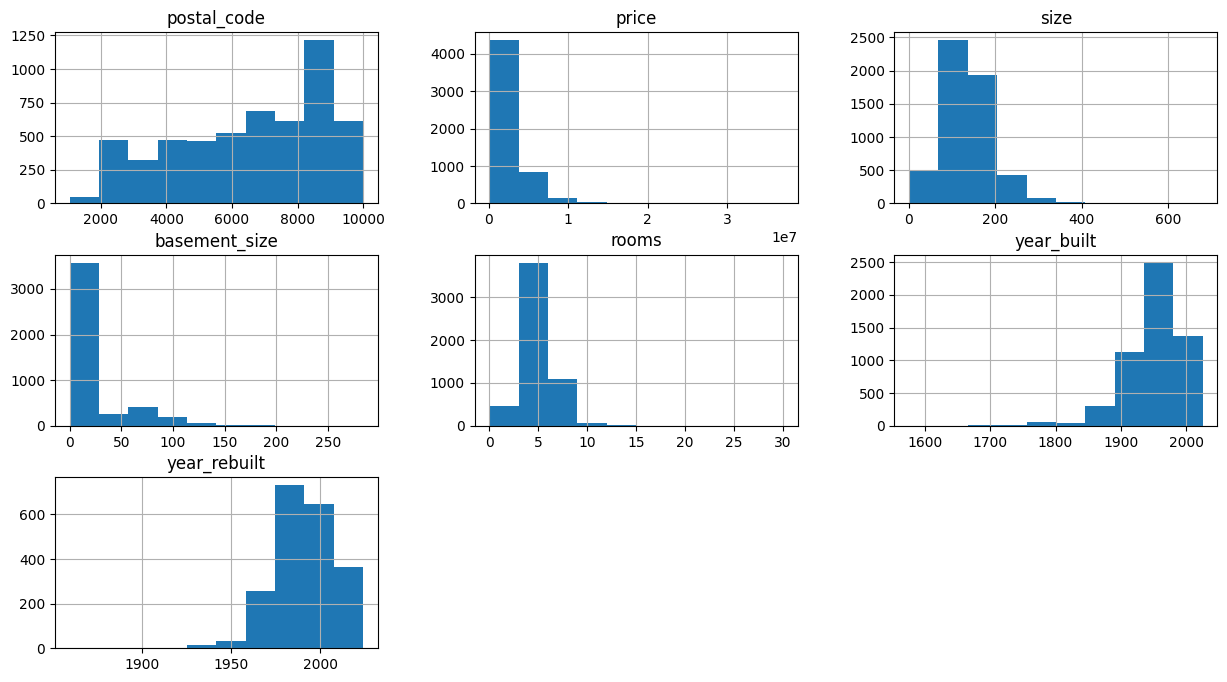

In [1491]:
data.hist(figsize = (15, 8))

<Axes: >

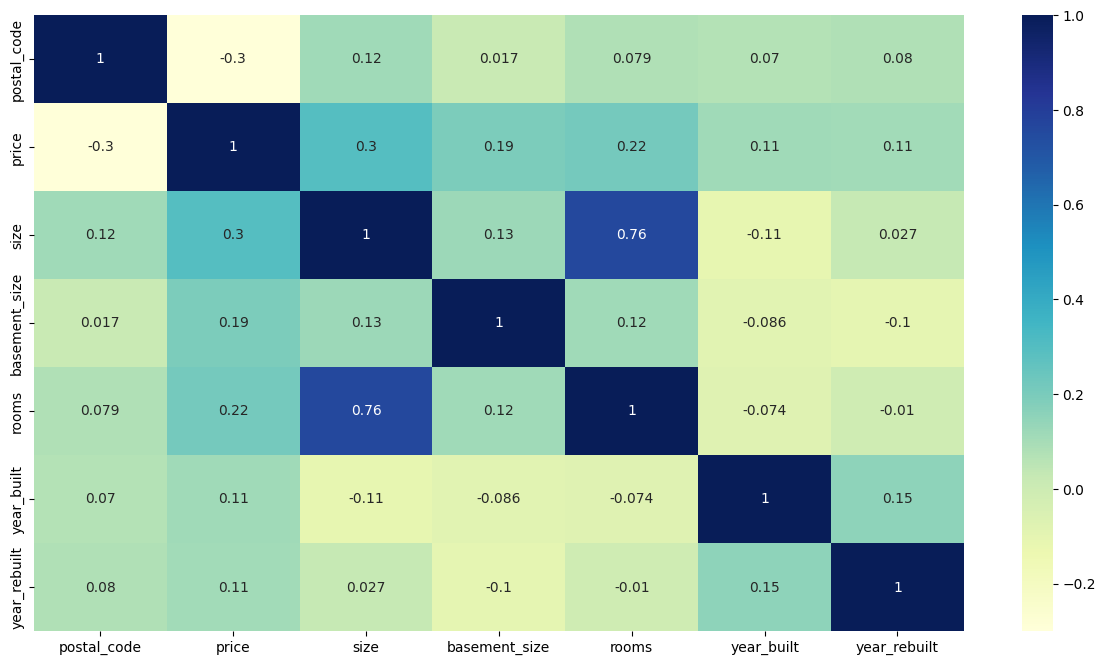

In [1492]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot = True, cmap = "YlGnBu")

# Preprocessing

In [1493]:
def preprocess_data(data, transformations: bool = False, encoding: str = 'normal', drop_low_corr: bool = False):
    # Fill the missing values
    data['year_rebuilt'] = data['year_rebuilt'].where(~data['year_rebuilt'].isna(), data['year_built']).astype(int)
    
    # Drop the columns that are not needed
    data = data.dropna()
    data = data.drop(['url', 'address'], axis = 1)


    # Apply the transformations
    if transformations:
        data['postal_code'] = (data['postal_code'] + 1) ** 2
        data['rooms'] = np.log(data['rooms'] + 1)
        data['size'] = np.log(data['size'] + 1)
        data['basement_size'] = np.log(data['basement_size'] + 1)
        data['year_built'] = (data['year_built'] + 1) ** 2
        data['year_rebuilt'] = (data['year_rebuilt'] + 1) ** 2

    # Encode the categorical variables
    if encoding == 'normal':
        data['type'] = data['type'].astype('category').cat.codes
        data['energy_label'] = data['energy_label'].astype('category').cat.codes
    elif encoding == 'onehot':
        data = pd.get_dummies(data, columns = ['type', 'energy_label'], drop_first = True, dtype=int)
    else:
        raise ValueError("The encoding parameter must be either 'normal' or 'onehot'")

    # Drop the columns that have low correlation with the target variable
    if drop_low_corr:
        for column in data.select_dtypes(include = np.number).columns:
            if abs(data[column].corr(data['price'])) < 0.1:
                data = data.drop(column, axis = 1)
        
    return data

In [1494]:
preprocessed_data = preprocess_data(data, transformations = False, encoding = 'normal', drop_low_corr = False)

array([[<Axes: title={'center': 'postal_code'}>,
        <Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'basement_size'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'year_built'}>,
        <Axes: title={'center': 'year_rebuilt'}>,
        <Axes: title={'center': 'energy_label'}>]], dtype=object)

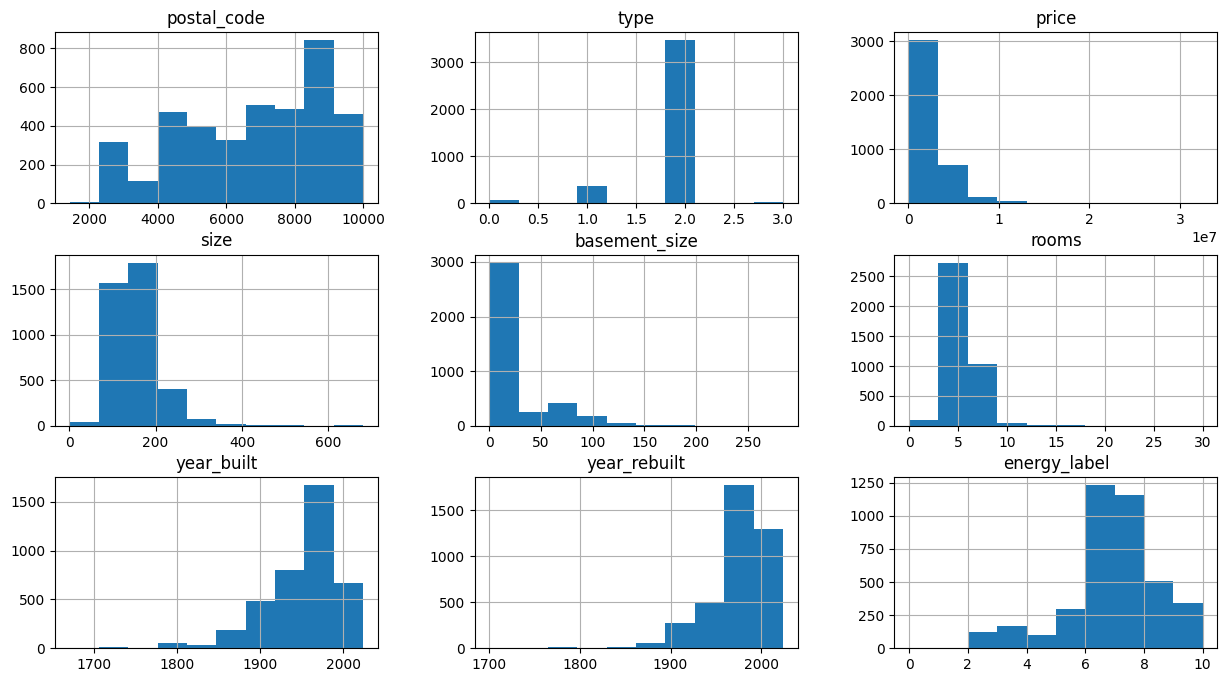

In [1495]:
preprocessed_data.hist(figsize = (15, 8))

<Axes: >

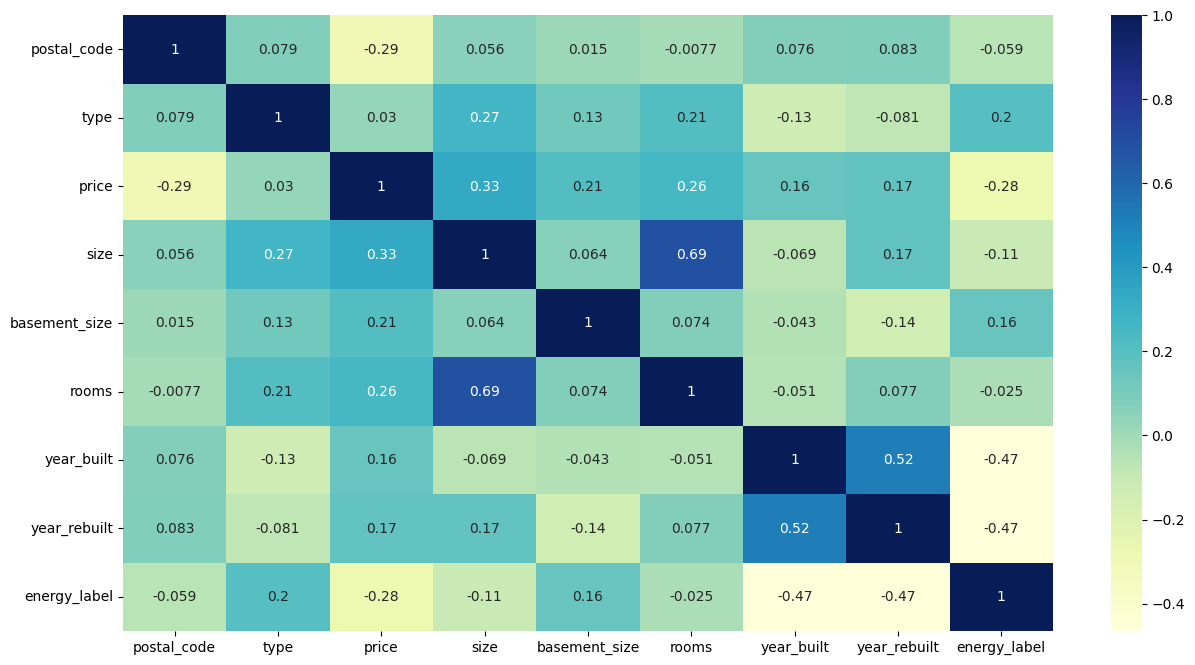

In [1496]:
plt.figure(figsize = (15, 8))
sns.heatmap(preprocessed_data.select_dtypes(include = np.number).corr(), annot = True, cmap = "YlGnBu")

In [1497]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data.drop(['price'], axis = 1), preprocessed_data['price'], test_size = 0.2, random_state = 0)
X_train

,postal_code,type,size,basement_size,rooms,year_built,year_rebuilt,energy_label
5181,8830,2,135,6.0,6,1945,1945,7
726,4652,2,180,0.0,7,1973,1978,7
1295,5690,2,208,80.0,7,1976,1976,6
5041,9000,2,141,110.0,6,1959,2011,6
479,8800,2,148,45.0,4,1965,1975,7
...,...,...,...,...,...,...,...,...
1149,9500,2,187,0.0,5,1976,2015,5
4509,8230,1,145,9.0,3,1850,1972,8
2273,6800,2,120,0.0,4,1994,1994,6
3555,6280,2,120,0.0,4,1870,1870,10


# Regression 

Before performing regression, we encode labels for the "Type of house" and the "Energy Label". 


In [1498]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

warnings.simplefilter(action='ignore', category=FutureWarning)
np.set_printoptions(suppress=True)

In [1499]:
"""
The type of the house  and energy_label is a categorical variable, 
and we need to encode it to a numerical value. 
We can use the LabelEncoder from sklearn to do this.
"""
def encodeData(x_data: pd.DataFrame, scaling:bool) -> pd.DataFrame:
    #Encode the type and energy_label to numbers
    x_data['type'] = LabelEncoder().fit_transform(x_data['type'])
    x_data['energy_label'] = LabelEncoder().fit_transform(x_data['energy_label'])
    #Drop the address and URL 
    x_data = x_data.drop(['address'], axis = 1)
    x_data = x_data.drop(['url'], axis = 1)
    #If Rebuilds = None, set year_rebuilt = year_built
    x_data['year_rebuilt'] = x_data['year_rebuilt'].where(~x_data['year_rebuilt'].isna(), x_data['year_built']).astype(int)
    x_data['basement_size'] = x_data["basement_size"].fillna(0)

    #Check for any NaN values
    for index, row in x_data.iterrows():
      if row.isna().any():
        print("Row", index, "contains NaN values:")
        print(row)
        raise ValueError("NaN values in row", index)
    
    #Scale the dataset
    if scaling: 
      scaler = StandardScaler()
      x_data = pd.DataFrame(scaler.fit_transform(x_data), columns = x_data.columns)
    return x_data

# encoded_X_train = encodeData(X_train, scaling=True)
# encoded_X_test = encodeData(X_test, scaling=True)
# display(encoded_X_train)

## Lasso and Ridge Regression 

Scores [0.33748648 0.36508418 0.2891049  0.28311438 0.39101832]
Test score:  0.36168189989036126

Coefficients: 
postal_code: -378.98144981386827
type: 67596.81017032995
size: 11604.400350170123
basement_size: 17093.545587791825
rooms: 54836.728499798184
year_built: 3773.402312886714
year_rebuilt: 1543.3733552543106
energy_label: -367088.0138856989

Intercept:  -5421767.901272064


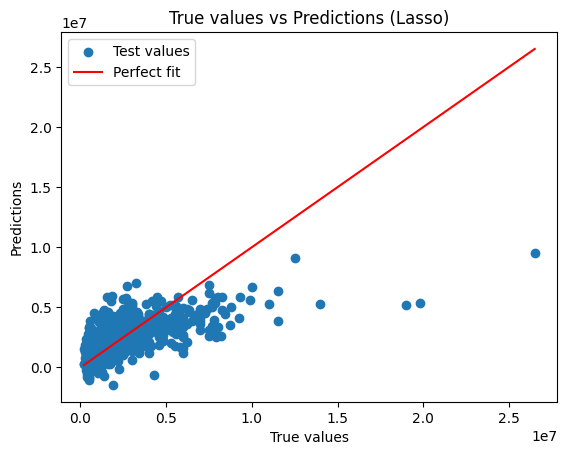

Scores [0.33758505 0.36510616 0.28906408 0.28311818 0.3910086 ]
Test score:  0.3616835518829451

Coefficients: 
postal_code: -378.95180991891334
type: 65598.41503350424
size: 11612.51624444461
basement_size: 17091.662456110465
rooms: 54688.529370724806
year_built: 3780.264039662588
year_rebuilt: 1550.3327299950843
energy_label: -366365.20457060135

Intercept:  -5450503.390466301


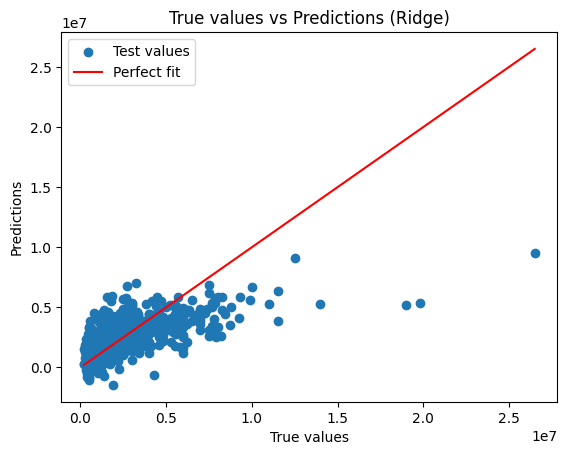

In [1500]:
def regression(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    score = cross_val_score(model, x_train, y_train, cv = 5)
    print("Scores", score)
    print("Test score: ", model.score(x_test, y_test))
    #print(x_train.columns)
    print("\nCoefficients: ")
    for feature, coef in zip(x_train.columns, model.coef_):
        print(f"{feature}: {coef}")
    print("\nIntercept: ", model.intercept_)

    #Predicting the test set results
    y_pred = model.predict(x_test)
    #Plotting the test set results
    plt.scatter(y_test, y_pred)
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    #Plotting the perfect fit line
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c = 'r')
    #Name the perfect fit line
    plt.legend(['Test values', 'Perfect fit'])
    plt.title(f'True values vs Predictions ({model.__class__.__name__})')
    plt.show()

#linear_model_ = linear_model.LinearRegression()
lasso_model = linear_model.Lasso(alpha = 10)
ridge_model = linear_model.Ridge(alpha = 10)
#regression(linear_model_, encoded_X_train, y_train, encoded_X_test, y_test)
regression(lasso_model, X_train, y_train, X_test, y_test)
regression(ridge_model, X_train, y_train, X_test, y_test)

For this results, we have the following: 
  1. Lasso Scores: These are cross-validation scores obtained using 5-fold cross-validation. They represent the R-squared values achieved by the Lasso model on different folds of the training data. Each score corresponds to one fold.
  2. Lasso test score: This is the R-squared score of the model on the held-out test set.
  3. Lasso coefficients: These are the weights assigned to each feature by the Lasso model. 
  4. Lasso intercept: This is the bias term of the model.